In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 3:
1. Merge training and test data
2. Include named entity


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     14891
          JV       0.85      0.86      0.85      4294
          EN       0.93      0.68      0.78      2076
          NE       0.82      0.40      0.53       900
           O       0.99      0.96      0.97      5909
   MIX-ID-EN       0.98      0.85      0.91       771
   MIX-ID-JV       0.98      0.82      0.89       256
   MIX-JV-EN       0.96      0.82      0.89       227

    accuracy                           0.91     29324
   macro avg       0.93      0.79      0.85     29324
weighted avg       0.91      0.91      0.90     29324



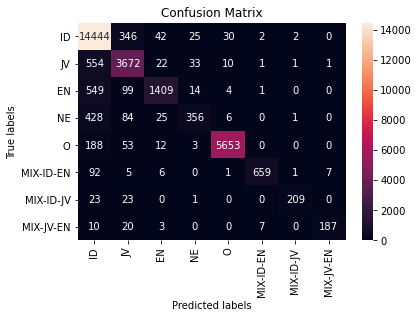


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     34238
          JV       0.93      0.94      0.94      9530
          EN       0.98      0.92      0.95      4547
          NE       0.97      0.84      0.90      2386
           O       1.00      0.98      0.99     13407
   MIX-ID-EN       0.99      0.97      0.98      1914
   MIX-ID-JV       1.00      0.90      0.95       574
   MIX-JV-EN       0.97      0.92      0.95       556

    accuracy                           0.97     67152
   macro avg       0.98      0.93      0.95     67152
weighted avg       0.97      0.97      0.97     67152



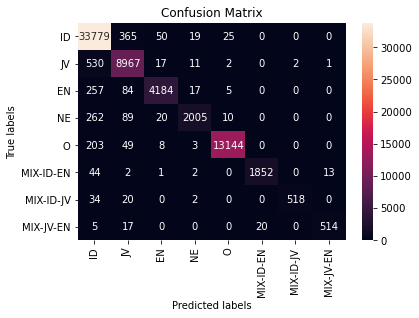


Top likely transitions:
O          -> O          4.97497
EN         -> O          4.10667
ID         -> O          4.08086
NE         -> O          3.88909
JV         -> O          3.85818
MIX-JV-EN  -> O          3.80244
MIX-ID-EN  -> O          3.53916
MIX-ID-JV  -> O          3.15603
NE         -> NE         1.80032
EN         -> EN         1.24746
JV         -> JV         0.91099
EN         -> NE         0.69794
ID         -> NE         0.62403
MIX-JV-EN  -> NE         0.52343
JV         -> MIX-JV-EN  0.49477
ID         -> ID         0.41271
MIX-JV-EN  -> JV         0.40666
ID         -> MIX-ID-EN  0.36810
JV         -> NE         0.32133
MIX-ID-JV  -> NE         0.12701

Top unlikely transitions:
NE         -> JV         -0.84247
NE         -> EN         -0.84322
MIX-ID-EN  -> EN         -0.85532
MIX-ID-JV  -> ID         -0.92419
NE         -> MIX-ID-JV  -1.14575
NE         -> MIX-ID-EN  -1.20730
EN         -> MIX-JV-EN  -1.23974
ID         -> JV         -1.35657
MIX-ID-JV  -> EN

In [3]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged.tsv')
langid.train_test_result(data=dataset, test_size=0.3, n_label=8, model_name='mod_090422.pkl')

In [4]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)